In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [4]:
train = pd.read_csv('KaggleChallenge/champs-scalar-coupling/train.csv')
test = pd.read_csv('KaggleChallenge/champs-scalar-coupling/test.csv')
structures = pd.read_csv('KaggleChallenge/champs-scalar-coupling/structures.csv')

In [5]:
# Map the atom structure data into train and test files

def map_atom_info(df, atom_idx):
    df = pd.merge(df, structures, how = 'left',
                  left_on  = ['molecule_name', f'atom_index_{atom_idx}'],
                  right_on = ['molecule_name',  'atom_index'])
    
    df = df.drop('atom_index', axis=1)
    df = df.rename(columns={'atom': f'atom_{atom_idx}',
                            'x': f'x_{atom_idx}',
                            'y': f'y_{atom_idx}',
                            'z': f'z_{atom_idx}'})
    return df

In [6]:
def map_mulliken_charge(df,atom_idx) :
    df = pd.merge(df,mulliken_charge,how = 'left',
                 left_on = ['molecule_name',f'atom_index_{atom_idx}'],
                 right_on = ['molecule_name','atom_index']
                 )
    df = df.rename(columns={'mulliken_charge': f'mulliken_charge_{atom_idx}'}
                  )
    df = df.drop('atom_index',axis = 1)
    return df


In [7]:
train

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.807600
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.257000
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.254800
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.254300
4,4,dsgdb9nsd_000001,2,0,1JHC,84.807400
5,5,dsgdb9nsd_000001,2,3,2JHH,-11.254100
6,6,dsgdb9nsd_000001,2,4,2JHH,-11.254800
7,7,dsgdb9nsd_000001,3,0,1JHC,84.809300
8,8,dsgdb9nsd_000001,3,4,2JHH,-11.254300
9,9,dsgdb9nsd_000001,4,0,1JHC,84.809500


In [8]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

Mem. usage decreased to 106.62 Mb (50.0% reduction)
Mem. usage decreased to 52.57 Mb (45.0% reduction)


In [9]:
from tqdm import tqdm_notebook as tqdm
atomic_radius = {'H':0.38, 'C':0.77, 'N':0.75, 'O':0.73, 'F':0.71} # Without fudge factor

fudge_factor = 0.05
atomic_radius = {k:v + fudge_factor for k,v in atomic_radius.items()}
print(atomic_radius)

{'H': 0.43, 'C': 0.8200000000000001, 'N': 0.8, 'O': 0.78, 'F': 0.76}


In [10]:
electronegativity = {'H':2.2, 'C':2.55, 'N':3.04, 'O':3.44, 'F':3.98}

#structures = pd.read_csv(structures, dtype={'atom_index':np.int8})

atoms = structures['atom'].values
atoms_en = [electronegativity[x] for x in tqdm(atoms)]
atoms_rad = [atomic_radius[x] for x in tqdm(atoms)]

structures['EN'] = atoms_en
structures['rad'] = atoms_rad

display(structures.head())

,molecule_name,atom_index,atom,x,y,z,EN,rad
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001,2.55,0.82
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976,2.20,0.43
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277,2.20,0.43
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644,2.20,0.43
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397,2.20,0.43


In [11]:
i_atom = structures['atom_index'].values
p = structures[['x', 'y', 'z']].values
p_compare = p
m = structures['molecule_name'].values
m_compare = m
r = structures['rad'].values
r_compare = r

source_row = np.arange(len(structures))
max_atoms = 28

bonds = np.zeros((len(structures)+1, max_atoms+1), dtype=np.int8)
bond_dists = np.zeros((len(structures)+1, max_atoms+1), dtype=np.float32)

print('Calculating the bonds')

Calculating the bonds


In [12]:
for i in tqdm(range(max_atoms-1)):
    p_compare = np.roll(p_compare, -1, axis=0)
    m_compare = np.roll(m_compare, -1, axis=0)
    r_compare = np.roll(r_compare, -1, axis=0)
    
    mask = np.where(m == m_compare, 1, 0) #Are we still comparing atoms in the same molecule?
    dists = np.linalg.norm(p - p_compare, axis=1) * mask
    r_bond = r + r_compare
    
    bond = np.where(np.logical_and(dists > 0.0001, dists < r_bond), 1, 0)
    
    source_row = source_row
    target_row = source_row + i + 1 #Note: Will be out of bounds of bonds array for some values of i
    target_row = np.where(np.logical_or(target_row > len(structures), mask==0), len(structures), target_row) #If invalid target, write to dummy row
    
    source_atom = i_atom
    target_atom = i_atom + i + 1 #Note: Will be out of bounds of bonds array for some values of i
    target_atom = np.where(np.logical_or(target_atom > max_atoms, mask==0), max_atoms, target_atom) #If invalid target, write to dummy col
    
    bonds[(source_row, target_atom)] = bond
    bonds[(target_row, source_atom)] = bond
    bond_dists[(source_row, target_atom)] = dists
    bond_dists[(target_row, source_atom)] = dists

bonds = np.delete(bonds, axis=0, obj=-1) #Delete dummy row
bonds = np.delete(bonds, axis=1, obj=-1) #Delete dummy col
bond_dists = np.delete(bond_dists, axis=0, obj=-1) #Delete dummy row
bond_dists = np.delete(bond_dists, axis=1, obj=-1) #Delete dummy col

print('Counting and condensing bonds')

bonds_numeric = [[i for i,x in enumerate(row) if x] for row in tqdm(bonds)]
bond_lengths = [[dist for i,dist in enumerate(row) if i in bonds_numeric[j]] for j,row in enumerate(tqdm(bond_dists))]
bond_lengths_mean = [ np.mean(x) for x in bond_lengths]
n_bonds = [len(x) for x in bonds_numeric]


bond_data = {'n_bonds':n_bonds, 'bond_lengths_mean': bond_lengths_mean }
bond_df = pd.DataFrame(bond_data)
structures = structures.join(bond_df)
display(structures.head(20))


Counting and condensing bonds


,molecule_name,atom_index,atom,x,y,z,EN,rad,n_bonds,bond_lengths_mean
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001,2.55,0.82,4,1.091950
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976,2.20,0.43,1,1.091953
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277,2.20,0.43,1,1.091952
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644,2.20,0.43,1,1.091946
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397,2.20,0.43,1,1.091948
5,dsgdb9nsd_000002,0,N,-0.040426,1.024108,0.062564,3.04,0.80,3,1.017195
6,dsgdb9nsd_000002,1,H,0.017257,0.012545,-0.027377,2.20,0.43,1,1.017190
7,dsgdb9nsd_000002,2,H,0.915789,1.358745,-0.028758,2.20,0.43,1,1.017187
8,dsgdb9nsd_000002,3,H,-0.520278,1.343532,-0.775543,2.20,0.43,1,1.017208
9,dsgdb9nsd_000003,0,O,-0.034360,0.977540,0.007602,3.44,0.78,2,0.962107


In [13]:
train = map_atom_info(train, 0)
train = map_atom_info(train, 1)

test = map_atom_info(test, 0)
test = map_atom_info(test, 1)

In [14]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,...,n_bonds_x,bond_lengths_mean_x,atom_1,x_1,y_1,z_1,EN_y,rad_y,n_bonds_y,bond_lengths_mean_y
0,0,dsgdb9nsd_000001,1,0,1JHC,84.812500,H,0.002150,-0.006031,0.001976,...,1,1.091953,C,-0.012698,1.085804,0.008001,2.55,0.82,4,1.091950
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.257812,H,0.002150,-0.006031,0.001976,...,1,1.091953,H,1.011731,1.463751,0.000277,2.20,0.43,1,1.091952
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.257812,H,0.002150,-0.006031,0.001976,...,1,1.091953,H,-0.540815,1.447527,-0.876644,2.20,0.43,1,1.091946
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.257812,H,0.002150,-0.006031,0.001976,...,1,1.091953,H,-0.523814,1.437933,0.906397,2.20,0.43,1,1.091948
4,4,dsgdb9nsd_000001,2,0,1JHC,84.812500,H,1.011731,1.463751,0.000277,...,1,1.091952,C,-0.012698,1.085804,0.008001,2.55,0.82,4,1.091950


In [15]:
test.head()

,id,molecule_name,atom_index_0,atom_index_1,type,atom_0,x_0,y_0,z_0,EN_x,...,n_bonds_x,bond_lengths_mean_x,atom_1,x_1,y_1,z_1,EN_y,rad_y,n_bonds_y,bond_lengths_mean_y
0,4658147,dsgdb9nsd_000004,2,0,2JHC,H,-1.661639,0.0,1.0,2.2,...,1,1.062099,C,0.599539,0.0,1.0,2.55,0.82,2,1.130589
1,4658148,dsgdb9nsd_000004,2,1,1JHC,H,-1.661639,0.0,1.0,2.2,...,1,1.062099,C,-0.599539,0.0,1.0,2.55,0.82,2,1.130589
2,4658149,dsgdb9nsd_000004,2,3,3JHH,H,-1.661639,0.0,1.0,2.2,...,1,1.062099,H,1.661639,0.0,1.0,2.20,0.43,1,1.062099
3,4658150,dsgdb9nsd_000004,3,0,1JHC,H,1.661639,0.0,1.0,2.2,...,1,1.062099,C,0.599539,0.0,1.0,2.55,0.82,2,1.130589
4,4658151,dsgdb9nsd_000004,3,1,2JHC,H,1.661639,0.0,1.0,2.2,...,1,1.062099,C,-0.599539,0.0,1.0,2.55,0.82,2,1.130589


In [16]:
train_p_0 = train[['x_0', 'y_0', 'z_0']].values
train_p_1 = train[['x_1', 'y_1', 'z_1']].values
test_p_0 = test[['x_0', 'y_0', 'z_0']].values
test_p_1 = test[['x_1', 'y_1', 'z_1']].values

train['dist'] = np.linalg.norm(train_p_0 - train_p_1, axis=1)
test['dist'] = np.linalg.norm(test_p_0 - test_p_1, axis=1)
train['dist_x'] = (train['x_0'] - train['x_1']) ** 2
test['dist_x'] = (test['x_0'] - test['x_1']) ** 2
train['dist_y'] = (train['y_0'] - train['y_1']) ** 2
test['dist_y'] = (test['y_0'] - test['y_1']) ** 2
train['dist_z'] = (train['z_0'] - train['z_1']) ** 2
test['dist_z'] = (test['z_0'] - test['z_1']) ** 2

train['type_0'] = train['type'].apply(lambda x: x[0])
test['type_0'] = test['type'].apply(lambda x: x[0])

In [17]:
train

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,...,z_1,EN_y,rad_y,n_bonds_y,bond_lengths_mean_y,dist,dist_x,dist_y,dist_z,type_0
0,0,dsgdb9nsd_000001,1,0,1JHC,84.812500,H,0.002150,-0.006031,0.001976,...,0.008001,2.55,0.82,4,1.091950,1.091953,0.000220,1.192105,3.629912e-05,1
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.257812,H,0.002150,-0.006031,0.001976,...,0.000277,2.20,0.43,1,1.091952,1.783120,1.019253,2.160261,2.888455e-06,2
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.257812,H,0.002150,-0.006031,0.001976,...,-0.876644,2.20,0.43,1,1.091946,1.783147,0.294812,2.112831,7.719728e-01,2
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.257812,H,0.002150,-0.006031,0.001976,...,0.906397,2.20,0.43,1,1.091948,1.783157,0.276638,2.085032,8.179777e-01,2
4,4,dsgdb9nsd_000001,2,0,1JHC,84.812500,H,1.011731,1.463751,0.000277,...,0.008001,2.55,0.82,4,1.091950,1.091952,1.049455,0.142844,5.966668e-05,1
5,5,dsgdb9nsd_000001,2,3,2JHH,-11.257812,H,1.011731,1.463751,0.000277,...,-0.876644,2.20,0.43,1,1.091946,1.783158,2.410399,0.000263,7.689892e-01,2
6,6,dsgdb9nsd_000001,2,4,2JHH,-11.257812,H,1.011731,1.463751,0.000277,...,0.906397,2.20,0.43,1,1.091948,1.783148,2.357897,0.000667,8.210548e-01,2
7,7,dsgdb9nsd_000001,3,0,1JHC,84.812500,H,-0.540815,1.447527,-0.876644,...,0.008001,2.55,0.82,4,1.091950,1.091946,0.278907,0.130843,7.825963e-01,1
8,8,dsgdb9nsd_000001,3,4,2JHH,-11.257812,H,-0.540815,1.447527,-0.876644,...,0.906397,2.20,0.43,1,1.091948,1.783148,0.000289,0.000092,3.179235e+00,2
9,9,dsgdb9nsd_000001,4,0,1JHC,84.812500,H,-0.523814,1.437933,0.906397,...,0.008001,2.55,0.82,4,1.091950,1.091948,0.261239,0.123994,8.071159e-01,1


In [18]:
molecules = train.pop('molecule_name')
test = test.drop('molecule_name', axis=1)

#scalar_coupling_constant = train.pop('scalar_coupling_constant')

for f in ['atom_1', 'type_0', 'type','atom_0']:
        lbl = LabelEncoder()
        lbl.fit(list(train[f].values) + list(test[f].values))
        train[f] = lbl.transform(list(train[f].values))
        test[f] = lbl.transform(list(test[f].values))

In [19]:
train

,id,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,EN_x,...,z_1,EN_y,rad_y,n_bonds_y,bond_lengths_mean_y,dist,dist_x,dist_y,dist_z,type_0
0,0,1,0,0,84.812500,0,0.002150,-0.006031,0.001976,2.2,...,0.008001,2.55,0.82,4,1.091950,1.091953,0.000220,1.192105,3.629912e-05,0
1,1,1,2,3,-11.257812,0,0.002150,-0.006031,0.001976,2.2,...,0.000277,2.20,0.43,1,1.091952,1.783120,1.019253,2.160261,2.888455e-06,1
2,2,1,3,3,-11.257812,0,0.002150,-0.006031,0.001976,2.2,...,-0.876644,2.20,0.43,1,1.091946,1.783147,0.294812,2.112831,7.719728e-01,1
3,3,1,4,3,-11.257812,0,0.002150,-0.006031,0.001976,2.2,...,0.906397,2.20,0.43,1,1.091948,1.783157,0.276638,2.085032,8.179777e-01,1
4,4,2,0,0,84.812500,0,1.011731,1.463751,0.000277,2.2,...,0.008001,2.55,0.82,4,1.091950,1.091952,1.049455,0.142844,5.966668e-05,0
5,5,2,3,3,-11.257812,0,1.011731,1.463751,0.000277,2.2,...,-0.876644,2.20,0.43,1,1.091946,1.783158,2.410399,0.000263,7.689892e-01,1
6,6,2,4,3,-11.257812,0,1.011731,1.463751,0.000277,2.2,...,0.906397,2.20,0.43,1,1.091948,1.783148,2.357897,0.000667,8.210548e-01,1
7,7,3,0,0,84.812500,0,-0.540815,1.447527,-0.876644,2.2,...,0.008001,2.55,0.82,4,1.091950,1.091946,0.278907,0.130843,7.825963e-01,0
8,8,3,4,3,-11.257812,0,-0.540815,1.447527,-0.876644,2.2,...,0.906397,2.20,0.43,1,1.091948,1.783148,0.000289,0.000092,3.179235e+00,1
9,9,4,0,0,84.812500,0,-0.523814,1.437933,0.906397,2.2,...,0.008001,2.55,0.82,4,1.091950,1.091948,0.261239,0.123994,8.071159e-01,0


In [20]:
train = train.drop('id',axis = 1)
#test = test.drop('id',axis = 1)

In [21]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest = train_test_split(train, test_size=0.1)

In [22]:
Ytrain = Xtrain.pop('scalar_coupling_constant')
Ytest = Xtest.pop('scalar_coupling_constant')

In [23]:
scaler = preprocessing.StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)

C:\Users\dragos.munteanu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dragos.munteanu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\dragos.munteanu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dragos.munteanu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return

In [24]:
import tensorflow as tf
import keras.backend as K
from keras import metrics

import keras
from keras.engine.input_layer import Input

import matplotlib.pyplot as plt
import seaborn as sns

import random, os, sys
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.initializers import *
import tensorflow as tf
from keras.engine.topology import Layer
from keras import callbacks

pd.set_option('precision', 30)
np.set_printoptions(precision = 30)

np.random.seed(368)
tf.set_random_seed(368)

Using TensorFlow backend.


In [25]:
def nn_model() :
    i  = Input(shape = (24,))
    
    # DL Simple Block
    x = Dense(128,activation = 'relu')(i)
    x = BatchNormalization()(x)
    x = Dense(64,activation = 'relu')(x)
    x = BatchNormalization()(x)
    x = Dense(32,activation = 'relu')(x)
    x = BatchNormalization()(x)
    x = Dense(16,activation = 'relu')(x)
    x = BatchNormalization()(x)
    
    x_output = Dense(1,activation = 'linear',name = 'scaler_coupling_constant')(x)
    
    
    return Model(inputs = [i] , output = [x_output])

In [26]:
model = nn_model()
model.compile(loss='mean_absolute_error', optimizer='adam')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\dragos.munteanu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3200      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)                128       
__________

In [27]:
history = model.fit(x = Xtrain,y = Ytrain,
                    validation_split=0.1,epochs=20,verbose=1,batch_size = 1024)

Instructions for updating:
Use tf.cast instead.
Train on 3773098 samples, validate on 419234 samples
Epoch 1/20


1387520/3773098 [==========>...................] - ETA: 3:08:02 - loss: 18.477 - ETA: 38:16 - loss: 18.4530  - ETA: 21:35 - loss: 18.488 - ETA: 14:07 - loss: 18.054 - ETA: 11:08 - loss: 17.861 - ETA: 9:15 - loss: 17.654 - ETA: 7:56 - loss: 17.63 - ETA: 6:58 - loss: 17.46 - ETA: 6:04 - loss: 17.32 - ETA: 5:31 - loss: 17.30 - ETA: 4:58 - loss: 17.29 - ETA: 4:32 - loss: 17.22 - ETA: 4:10 - loss: 17.17 - ETA: 3:56 - loss: 17.10 - ETA: 3:43 - loss: 16.99 - ETA: 3:32 - loss: 16.99 - ETA: 3:23 - loss: 16.94 - ETA: 3:12 - loss: 16.90 - ETA: 3:04 - loss: 16.88 - ETA: 2:58 - loss: 16.84 - ETA: 2:52 - loss: 16.81 - ETA: 2:44 - loss: 16.76 - ETA: 2:38 - loss: 16.70 - ETA: 2:32 - loss: 16.68 - ETA: 2:27 - loss: 16.66 - ETA: 2:22 - loss: 16.60 - ETA: 2:21 - loss: 16.60 - ETA: 2:19 - loss: 16.58 - ETA: 2:16 - loss: 16.57 - ETA: 2:13 - loss: 16.54 - ETA: 2:10 - loss: 16.51 - ETA: 2:08 - loss: 16.49 - ETA: 2:05 - loss: 16.47 - ETA: 2:03 - loss: 16.42 - ETA: 2:00 - loss: 16.40 - ETA: 1:58 - loss: 16.37 

2777088/3773098 [=====================>........] - ETA: 36s - loss: 6.72 - ETA: 36s - loss: 6.70 - ETA: 36s - loss: 6.69 - ETA: 36s - loss: 6.68 - ETA: 36s - loss: 6.67 - ETA: 36s - loss: 6.65 - ETA: 36s - loss: 6.64 - ETA: 36s - loss: 6.63 - ETA: 36s - loss: 6.62 - ETA: 36s - loss: 6.60 - ETA: 36s - loss: 6.59 - ETA: 35s - loss: 6.58 - ETA: 35s - loss: 6.57 - ETA: 35s - loss: 6.56 - ETA: 35s - loss: 6.54 - ETA: 35s - loss: 6.53 - ETA: 35s - loss: 6.52 - ETA: 35s - loss: 6.51 - ETA: 35s - loss: 6.49 - ETA: 35s - loss: 6.48 - ETA: 35s - loss: 6.47 - ETA: 35s - loss: 6.46 - ETA: 35s - loss: 6.45 - ETA: 34s - loss: 6.43 - ETA: 34s - loss: 6.42 - ETA: 34s - loss: 6.41 - ETA: 34s - loss: 6.40 - ETA: 34s - loss: 6.38 - ETA: 34s - loss: 6.37 - ETA: 34s - loss: 6.36 - ETA: 34s - loss: 6.34 - ETA: 34s - loss: 6.33 - ETA: 34s - loss: 6.33 - ETA: 34s - loss: 6.31 - ETA: 34s - loss: 6.31 - ETA: 34s - loss: 6.30 - ETA: 33s - loss: 6.28 - ETA: 33s - loss: 6.27 - ETA: 33s - loss: 6.26 - ETA: 33s - lo

3773098/3773098 [==============================] - ETA: 14s - loss: 4.51 - ETA: 14s - loss: 4.51 - ETA: 14s - loss: 4.50 - ETA: 14s - loss: 4.50 - ETA: 14s - loss: 4.50 - ETA: 14s - loss: 4.49 - ETA: 14s - loss: 4.49 - ETA: 14s - loss: 4.49 - ETA: 14s - loss: 4.49 - ETA: 13s - loss: 4.48 - ETA: 13s - loss: 4.48 - ETA: 13s - loss: 4.48 - ETA: 13s - loss: 4.47 - ETA: 13s - loss: 4.47 - ETA: 13s - loss: 4.47 - ETA: 13s - loss: 4.46 - ETA: 13s - loss: 4.46 - ETA: 13s - loss: 4.46 - ETA: 13s - loss: 4.46 - ETA: 13s - loss: 4.45 - ETA: 13s - loss: 4.45 - ETA: 13s - loss: 4.45 - ETA: 13s - loss: 4.44 - ETA: 13s - loss: 4.44 - ETA: 13s - loss: 4.44 - ETA: 13s - loss: 4.44 - ETA: 13s - loss: 4.43 - ETA: 13s - loss: 4.43 - ETA: 12s - loss: 4.43 - ETA: 12s - loss: 4.42 - ETA: 12s - loss: 4.42 - ETA: 12s - loss: 4.42 - ETA: 12s - loss: 4.41 - ETA: 12s - loss: 4.41 - ETA: 12s - loss: 4.41 - ETA: 12s - loss: 4.41 - ETA: 12s - loss: 4.40 - ETA: 12s - loss: 4.40 - ETA: 12s - loss: 4.40 - ETA: 12s - lo

1564672/3773098 [===========>..................] - ETA: 18:42 - loss: 2.06 - ETA: 4:21 - loss: 2.0340 - ETA: 2:32 - loss: 2.140 - ETA: 1:55 - loss: 2.216 - ETA: 1:37 - loss: 2.212 - ETA: 1:26 - loss: 2.233 - ETA: 1:19 - loss: 2.241 - ETA: 1:14 - loss: 2.266 - ETA: 1:10 - loss: 2.236 - ETA: 1:07 - loss: 2.218 - ETA: 1:05 - loss: 2.204 - ETA: 1:03 - loss: 2.205 - ETA: 1:01 - loss: 2.199 - ETA: 1:00 - loss: 2.209 - ETA: 59s - loss: 2.198 - ETA: 58s - loss: 2.20 - ETA: 57s - loss: 2.20 - ETA: 56s - loss: 2.21 - ETA: 55s - loss: 2.20 - ETA: 55s - loss: 2.22 - ETA: 54s - loss: 2.23 - ETA: 53s - loss: 2.23 - ETA: 53s - loss: 2.22 - ETA: 52s - loss: 2.21 - ETA: 52s - loss: 2.21 - ETA: 52s - loss: 2.20 - ETA: 51s - loss: 2.20 - ETA: 51s - loss: 2.21 - ETA: 50s - loss: 2.20 - ETA: 50s - loss: 2.19 - ETA: 50s - loss: 2.20 - ETA: 50s - loss: 2.20 - ETA: 49s - loss: 2.20 - ETA: 49s - loss: 2.19 - ETA: 49s - loss: 2.19 - ETA: 49s - loss: 2.20 - ETA: 49s - loss: 2.20 - ETA: 49s - loss: 2.20 - ETA: 49

3000320/3773098 [======================>.......] - ETA: 27s - loss: 2.12 - ETA: 27s - loss: 2.12 - ETA: 27s - loss: 2.12 - ETA: 27s - loss: 2.12 - ETA: 27s - loss: 2.12 - ETA: 27s - loss: 2.12 - ETA: 27s - loss: 2.12 - ETA: 27s - loss: 2.12 - ETA: 27s - loss: 2.12 - ETA: 27s - loss: 2.12 - ETA: 27s - loss: 2.12 - ETA: 27s - loss: 2.12 - ETA: 27s - loss: 2.12 - ETA: 27s - loss: 2.12 - ETA: 27s - loss: 2.12 - ETA: 27s - loss: 2.12 - ETA: 27s - loss: 2.12 - ETA: 27s - loss: 2.12 - ETA: 27s - loss: 2.12 - ETA: 26s - loss: 2.12 - ETA: 26s - loss: 2.12 - ETA: 26s - loss: 2.12 - ETA: 26s - loss: 2.12 - ETA: 26s - loss: 2.12 - ETA: 26s - loss: 2.12 - ETA: 26s - loss: 2.12 - ETA: 26s - loss: 2.12 - ETA: 26s - loss: 2.12 - ETA: 26s - loss: 2.12 - ETA: 26s - loss: 2.12 - ETA: 26s - loss: 2.12 - ETA: 26s - loss: 2.12 - ETA: 26s - loss: 2.12 - ETA: 26s - loss: 2.12 - ETA: 25s - loss: 2.12 - ETA: 25s - loss: 2.12 - ETA: 25s - loss: 2.12 - ETA: 25s - loss: 2.12 - ETA: 25s - loss: 2.12 - ETA: 25s - lo

3773098/3773098 [==============================] - ETA: 10s - loss: 2.09 - ETA: 9s - loss: 2.0946 - ETA: 9s - loss: 2.094 - ETA: 9s - loss: 2.094 - ETA: 9s - loss: 2.094 - ETA: 9s - loss: 2.094 - ETA: 9s - loss: 2.094 - ETA: 9s - loss: 2.094 - ETA: 9s - loss: 2.094 - ETA: 9s - loss: 2.094 - ETA: 9s - loss: 2.094 - ETA: 9s - loss: 2.094 - ETA: 9s - loss: 2.094 - ETA: 9s - loss: 2.094 - ETA: 9s - loss: 2.094 - ETA: 9s - loss: 2.094 - ETA: 9s - loss: 2.093 - ETA: 9s - loss: 2.093 - ETA: 8s - loss: 2.093 - ETA: 8s - loss: 2.093 - ETA: 8s - loss: 2.093 - ETA: 8s - loss: 2.093 - ETA: 8s - loss: 2.094 - ETA: 8s - loss: 2.094 - ETA: 8s - loss: 2.094 - ETA: 8s - loss: 2.094 - ETA: 8s - loss: 2.094 - ETA: 8s - loss: 2.094 - ETA: 8s - loss: 2.093 - ETA: 8s - loss: 2.095 - ETA: 8s - loss: 2.095 - ETA: 8s - loss: 2.095 - ETA: 8s - loss: 2.095 - ETA: 8s - loss: 2.095 - ETA: 8s - loss: 2.095 - ETA: 8s - loss: 2.095 - ETA: 8s - loss: 2.095 - ETA: 7s - loss: 2.095 - ETA: 7s - loss: 2.094 - ETA: 7s - lo

1366016/3773098 [=========>....................] - ETA: 24:43 - loss: 1.95 - ETA: 5:44 - loss: 1.9487 - ETA: 4:08 - loss: 1.907 - ETA: 3:04 - loss: 2.152 - ETA: 2:41 - loss: 2.083 - ETA: 2:24 - loss: 2.088 - ETA: 2:08 - loss: 2.039 - ETA: 1:57 - loss: 2.018 - ETA: 1:51 - loss: 2.047 - ETA: 1:44 - loss: 2.035 - ETA: 1:39 - loss: 2.018 - ETA: 1:34 - loss: 2.024 - ETA: 1:30 - loss: 2.027 - ETA: 1:28 - loss: 2.015 - ETA: 1:25 - loss: 2.016 - ETA: 1:23 - loss: 2.017 - ETA: 1:21 - loss: 2.009 - ETA: 1:21 - loss: 1.999 - ETA: 1:21 - loss: 1.998 - ETA: 1:19 - loss: 1.996 - ETA: 1:19 - loss: 1.989 - ETA: 1:18 - loss: 1.992 - ETA: 1:17 - loss: 1.989 - ETA: 1:15 - loss: 1.997 - ETA: 1:15 - loss: 2.017 - ETA: 1:15 - loss: 2.022 - ETA: 1:15 - loss: 2.026 - ETA: 1:14 - loss: 2.033 - ETA: 1:13 - loss: 2.039 - ETA: 1:12 - loss: 2.035 - ETA: 1:12 - loss: 2.027 - ETA: 1:11 - loss: 2.021 - ETA: 1:12 - loss: 2.021 - ETA: 1:11 - loss: 2.024 - ETA: 1:10 - loss: 2.033 - ETA: 1:10 - loss: 2.032 - ETA: 1:09 - 

2721792/3773098 [====================>.........] - ETA: 33s - loss: 2.01 - ETA: 33s - loss: 2.01 - ETA: 33s - loss: 2.01 - ETA: 33s - loss: 2.01 - ETA: 33s - loss: 2.01 - ETA: 33s - loss: 2.01 - ETA: 33s - loss: 2.01 - ETA: 33s - loss: 2.01 - ETA: 33s - loss: 2.01 - ETA: 33s - loss: 2.01 - ETA: 33s - loss: 2.01 - ETA: 33s - loss: 2.01 - ETA: 33s - loss: 2.01 - ETA: 32s - loss: 2.01 - ETA: 32s - loss: 2.01 - ETA: 32s - loss: 2.01 - ETA: 32s - loss: 2.01 - ETA: 32s - loss: 2.01 - ETA: 32s - loss: 2.01 - ETA: 32s - loss: 2.01 - ETA: 32s - loss: 2.01 - ETA: 32s - loss: 2.01 - ETA: 32s - loss: 2.01 - ETA: 32s - loss: 2.01 - ETA: 32s - loss: 2.01 - ETA: 32s - loss: 2.01 - ETA: 32s - loss: 2.01 - ETA: 32s - loss: 2.01 - ETA: 32s - loss: 2.01 - ETA: 32s - loss: 2.01 - ETA: 32s - loss: 2.01 - ETA: 32s - loss: 2.01 - ETA: 32s - loss: 2.01 - ETA: 31s - loss: 2.01 - ETA: 31s - loss: 2.01 - ETA: 31s - loss: 2.01 - ETA: 31s - loss: 2.01 - ETA: 31s - loss: 2.01 - ETA: 31s - loss: 2.01 - ETA: 31s - lo

3773098/3773098 [==============================] - ETA: 14s - loss: 2.00 - ETA: 14s - loss: 2.00 - ETA: 14s - loss: 2.00 - ETA: 14s - loss: 1.99 - ETA: 14s - loss: 1.99 - ETA: 14s - loss: 1.99 - ETA: 14s - loss: 1.99 - ETA: 14s - loss: 1.99 - ETA: 14s - loss: 1.99 - ETA: 14s - loss: 1.99 - ETA: 14s - loss: 1.99 - ETA: 14s - loss: 2.00 - ETA: 14s - loss: 1.99 - ETA: 14s - loss: 1.99 - ETA: 14s - loss: 1.99 - ETA: 13s - loss: 1.99 - ETA: 13s - loss: 1.99 - ETA: 13s - loss: 1.99 - ETA: 13s - loss: 1.99 - ETA: 13s - loss: 1.99 - ETA: 13s - loss: 2.00 - ETA: 13s - loss: 2.00 - ETA: 13s - loss: 2.00 - ETA: 13s - loss: 2.00 - ETA: 13s - loss: 2.00 - ETA: 13s - loss: 2.00 - ETA: 13s - loss: 2.00 - ETA: 13s - loss: 2.00 - ETA: 13s - loss: 2.00 - ETA: 13s - loss: 2.00 - ETA: 13s - loss: 2.00 - ETA: 12s - loss: 2.00 - ETA: 12s - loss: 2.00 - ETA: 12s - loss: 2.00 - ETA: 12s - loss: 2.00 - ETA: 12s - loss: 2.00 - ETA: 12s - loss: 2.00 - ETA: 12s - loss: 2.00 - ETA: 12s - loss: 2.00 - ETA: 12s - lo

1509376/3773098 [===========>..................] - ETA: 22:49 - loss: 1.71 - ETA: 4:24 - loss: 1.8692 - ETA: 2:43 - loss: 1.812 - ETA: 2:12 - loss: 1.830 - ETA: 1:54 - loss: 1.821 - ETA: 1:39 - loss: 1.870 - ETA: 1:29 - loss: 1.893 - ETA: 1:24 - loss: 1.948 - ETA: 1:20 - loss: 1.944 - ETA: 1:16 - loss: 1.980 - ETA: 1:13 - loss: 1.988 - ETA: 1:10 - loss: 1.981 - ETA: 1:10 - loss: 1.979 - ETA: 1:08 - loss: 1.962 - ETA: 1:06 - loss: 1.964 - ETA: 1:04 - loss: 1.960 - ETA: 1:03 - loss: 1.960 - ETA: 1:02 - loss: 1.963 - ETA: 1:01 - loss: 1.976 - ETA: 1:00 - loss: 1.969 - ETA: 59s - loss: 1.960 - ETA: 58s - loss: 1.96 - ETA: 58s - loss: 1.96 - ETA: 57s - loss: 1.95 - ETA: 59s - loss: 1.95 - ETA: 1:00 - loss: 1.950 - ETA: 59s - loss: 1.951 - ETA: 59s - loss: 1.95 - ETA: 59s - loss: 1.95 - ETA: 58s - loss: 1.95 - ETA: 58s - loss: 1.95 - ETA: 58s - loss: 1.96 - ETA: 57s - loss: 1.96 - ETA: 57s - loss: 1.97 - ETA: 56s - loss: 1.96 - ETA: 56s - loss: 1.96 - ETA: 55s - loss: 1.96 - ETA: 55s - loss:

2850816/3773098 [=====================>........] - ETA: 29s - loss: 1.97 - ETA: 29s - loss: 1.97 - ETA: 29s - loss: 1.97 - ETA: 29s - loss: 1.97 - ETA: 29s - loss: 1.97 - ETA: 29s - loss: 1.97 - ETA: 29s - loss: 1.97 - ETA: 28s - loss: 1.97 - ETA: 28s - loss: 1.97 - ETA: 28s - loss: 1.97 - ETA: 28s - loss: 1.97 - ETA: 28s - loss: 1.97 - ETA: 28s - loss: 1.97 - ETA: 28s - loss: 1.97 - ETA: 28s - loss: 1.97 - ETA: 28s - loss: 1.97 - ETA: 28s - loss: 1.97 - ETA: 28s - loss: 1.97 - ETA: 28s - loss: 1.97 - ETA: 28s - loss: 1.97 - ETA: 28s - loss: 1.97 - ETA: 28s - loss: 1.97 - ETA: 27s - loss: 1.97 - ETA: 27s - loss: 1.97 - ETA: 27s - loss: 1.97 - ETA: 27s - loss: 1.97 - ETA: 27s - loss: 1.97 - ETA: 27s - loss: 1.97 - ETA: 27s - loss: 1.97 - ETA: 27s - loss: 1.97 - ETA: 27s - loss: 1.97 - ETA: 27s - loss: 1.97 - ETA: 27s - loss: 1.97 - ETA: 27s - loss: 1.97 - ETA: 27s - loss: 1.97 - ETA: 27s - loss: 1.97 - ETA: 27s - loss: 1.97 - ETA: 26s - loss: 1.97 - ETA: 26s - loss: 1.97 - ETA: 26s - lo

3773098/3773098 [==============================] - ETA: 12s - loss: 1.97 - ETA: 12s - loss: 1.97 - ETA: 12s - loss: 1.97 - ETA: 12s - loss: 1.97 - ETA: 12s - loss: 1.97 - ETA: 12s - loss: 1.97 - ETA: 12s - loss: 1.97 - ETA: 12s - loss: 1.97 - ETA: 12s - loss: 1.97 - ETA: 12s - loss: 1.97 - ETA: 12s - loss: 1.97 - ETA: 12s - loss: 1.97 - ETA: 12s - loss: 1.97 - ETA: 12s - loss: 1.97 - ETA: 12s - loss: 1.97 - ETA: 11s - loss: 1.97 - ETA: 11s - loss: 1.97 - ETA: 11s - loss: 1.97 - ETA: 11s - loss: 1.97 - ETA: 11s - loss: 1.97 - ETA: 11s - loss: 1.97 - ETA: 11s - loss: 1.97 - ETA: 11s - loss: 1.97 - ETA: 11s - loss: 1.97 - ETA: 11s - loss: 1.97 - ETA: 11s - loss: 1.97 - ETA: 11s - loss: 1.97 - ETA: 11s - loss: 1.97 - ETA: 11s - loss: 1.97 - ETA: 11s - loss: 1.97 - ETA: 11s - loss: 1.97 - ETA: 11s - loss: 1.97 - ETA: 10s - loss: 1.97 - ETA: 10s - loss: 1.97 - ETA: 10s - loss: 1.97 - ETA: 10s - loss: 1.97 - ETA: 10s - loss: 1.97 - ETA: 10s - loss: 1.97 - ETA: 10s - loss: 1.97 - ETA: 10s - lo

1305600/3773098 [=========>....................] - ETA: 22:12 - loss: 2.11 - ETA: 5:11 - loss: 1.8635 - ETA: 3:41 - loss: 1.826 - ETA: 2:57 - loss: 1.816 - ETA: 2:24 - loss: 1.875 - ETA: 2:18 - loss: 1.856 - ETA: 2:01 - loss: 1.871 - ETA: 1:54 - loss: 1.917 - ETA: 1:44 - loss: 1.937 - ETA: 1:37 - loss: 1.922 - ETA: 1:31 - loss: 1.915 - ETA: 1:27 - loss: 1.909 - ETA: 1:23 - loss: 1.898 - ETA: 1:20 - loss: 1.920 - ETA: 1:18 - loss: 1.958 - ETA: 1:15 - loss: 1.978 - ETA: 1:13 - loss: 1.967 - ETA: 1:12 - loss: 1.957 - ETA: 1:10 - loss: 1.961 - ETA: 1:09 - loss: 1.957 - ETA: 1:08 - loss: 1.957 - ETA: 1:07 - loss: 1.947 - ETA: 1:07 - loss: 1.944 - ETA: 1:06 - loss: 1.941 - ETA: 1:06 - loss: 1.936 - ETA: 1:05 - loss: 1.928 - ETA: 1:05 - loss: 1.933 - ETA: 1:04 - loss: 1.931 - ETA: 1:04 - loss: 1.924 - ETA: 1:04 - loss: 1.925 - ETA: 1:04 - loss: 1.927 - ETA: 1:03 - loss: 1.925 - ETA: 1:03 - loss: 1.926 - ETA: 1:03 - loss: 1.926 - ETA: 1:03 - loss: 1.931 - ETA: 1:03 - loss: 1.932 - ETA: 1:03 - 

2720768/3773098 [====================>.........] - ETA: 35s - loss: 1.95 - ETA: 35s - loss: 1.95 - ETA: 34s - loss: 1.95 - ETA: 34s - loss: 1.95 - ETA: 34s - loss: 1.95 - ETA: 34s - loss: 1.95 - ETA: 34s - loss: 1.95 - ETA: 34s - loss: 1.95 - ETA: 34s - loss: 1.95 - ETA: 34s - loss: 1.95 - ETA: 34s - loss: 1.95 - ETA: 34s - loss: 1.95 - ETA: 34s - loss: 1.95 - ETA: 34s - loss: 1.95 - ETA: 34s - loss: 1.95 - ETA: 34s - loss: 1.95 - ETA: 34s - loss: 1.95 - ETA: 34s - loss: 1.95 - ETA: 34s - loss: 1.95 - ETA: 34s - loss: 1.95 - ETA: 33s - loss: 1.95 - ETA: 33s - loss: 1.95 - ETA: 33s - loss: 1.95 - ETA: 33s - loss: 1.95 - ETA: 33s - loss: 1.95 - ETA: 33s - loss: 1.95 - ETA: 33s - loss: 1.95 - ETA: 33s - loss: 1.95 - ETA: 33s - loss: 1.95 - ETA: 33s - loss: 1.95 - ETA: 33s - loss: 1.95 - ETA: 33s - loss: 1.95 - ETA: 33s - loss: 1.95 - ETA: 33s - loss: 1.95 - ETA: 33s - loss: 1.95 - ETA: 32s - loss: 1.95 - ETA: 32s - loss: 1.95 - ETA: 32s - loss: 1.95 - ETA: 32s - loss: 1.95 - ETA: 32s - lo

3773098/3773098 [==============================] - ETA: 14s - loss: 1.94 - ETA: 14s - loss: 1.94 - ETA: 14s - loss: 1.94 - ETA: 14s - loss: 1.94 - ETA: 14s - loss: 1.94 - ETA: 14s - loss: 1.94 - ETA: 14s - loss: 1.94 - ETA: 14s - loss: 1.94 - ETA: 14s - loss: 1.94 - ETA: 14s - loss: 1.94 - ETA: 13s - loss: 1.94 - ETA: 13s - loss: 1.94 - ETA: 13s - loss: 1.94 - ETA: 13s - loss: 1.94 - ETA: 13s - loss: 1.94 - ETA: 13s - loss: 1.94 - ETA: 13s - loss: 1.94 - ETA: 13s - loss: 1.94 - ETA: 13s - loss: 1.94 - ETA: 13s - loss: 1.94 - ETA: 13s - loss: 1.94 - ETA: 13s - loss: 1.94 - ETA: 13s - loss: 1.94 - ETA: 13s - loss: 1.94 - ETA: 13s - loss: 1.94 - ETA: 13s - loss: 1.94 - ETA: 12s - loss: 1.94 - ETA: 12s - loss: 1.94 - ETA: 12s - loss: 1.94 - ETA: 12s - loss: 1.94 - ETA: 12s - loss: 1.94 - ETA: 12s - loss: 1.94 - ETA: 12s - loss: 1.94 - ETA: 12s - loss: 1.94 - ETA: 12s - loss: 1.94 - ETA: 12s - loss: 1.94 - ETA: 12s - loss: 1.94 - ETA: 12s - loss: 1.94 - ETA: 12s - loss: 1.94 - ETA: 12s - lo

1519616/3773098 [===========>..................] - ETA: 19:07 - loss: 2.55 - ETA: 3:46 - loss: 1.9912 - ETA: 2:22 - loss: 1.872 - ETA: 1:51 - loss: 1.894 - ETA: 1:35 - loss: 1.875 - ETA: 1:25 - loss: 1.841 - ETA: 1:18 - loss: 1.849 - ETA: 1:13 - loss: 1.870 - ETA: 1:09 - loss: 1.861 - ETA: 1:06 - loss: 1.890 - ETA: 1:03 - loss: 1.914 - ETA: 1:01 - loss: 1.904 - ETA: 1:00 - loss: 1.905 - ETA: 58s - loss: 1.903 - ETA: 57s - loss: 1.90 - ETA: 56s - loss: 1.90 - ETA: 55s - loss: 1.89 - ETA: 54s - loss: 1.89 - ETA: 53s - loss: 1.88 - ETA: 53s - loss: 1.90 - ETA: 52s - loss: 1.89 - ETA: 51s - loss: 1.89 - ETA: 51s - loss: 1.89 - ETA: 50s - loss: 1.89 - ETA: 50s - loss: 1.89 - ETA: 50s - loss: 1.89 - ETA: 49s - loss: 1.89 - ETA: 49s - loss: 1.89 - ETA: 48s - loss: 1.89 - ETA: 48s - loss: 1.89 - ETA: 48s - loss: 1.89 - ETA: 48s - loss: 1.88 - ETA: 47s - loss: 1.89 - ETA: 47s - loss: 1.89 - ETA: 47s - loss: 1.89 - ETA: 46s - loss: 1.89 - ETA: 46s - loss: 1.89 - ETA: 46s - loss: 1.89 - ETA: 46s 

3075072/3773098 [=======================>......] - ETA: 29s - loss: 1.92 - ETA: 29s - loss: 1.92 - ETA: 29s - loss: 1.92 - ETA: 29s - loss: 1.92 - ETA: 29s - loss: 1.92 - ETA: 29s - loss: 1.92 - ETA: 29s - loss: 1.92 - ETA: 29s - loss: 1.92 - ETA: 29s - loss: 1.92 - ETA: 29s - loss: 1.92 - ETA: 28s - loss: 1.92 - ETA: 28s - loss: 1.92 - ETA: 28s - loss: 1.92 - ETA: 28s - loss: 1.92 - ETA: 28s - loss: 1.92 - ETA: 28s - loss: 1.92 - ETA: 28s - loss: 1.92 - ETA: 28s - loss: 1.92 - ETA: 28s - loss: 1.92 - ETA: 28s - loss: 1.92 - ETA: 28s - loss: 1.92 - ETA: 28s - loss: 1.92 - ETA: 27s - loss: 1.92 - ETA: 27s - loss: 1.92 - ETA: 27s - loss: 1.92 - ETA: 27s - loss: 1.92 - ETA: 27s - loss: 1.92 - ETA: 27s - loss: 1.92 - ETA: 27s - loss: 1.92 - ETA: 27s - loss: 1.92 - ETA: 27s - loss: 1.92 - ETA: 27s - loss: 1.92 - ETA: 27s - loss: 1.92 - ETA: 27s - loss: 1.92 - ETA: 27s - loss: 1.92 - ETA: 27s - loss: 1.92 - ETA: 26s - loss: 1.92 - ETA: 26s - loss: 1.92 - ETA: 26s - loss: 1.92 - ETA: 26s - lo

3773098/3773098 [==============================] - ETA: 8s - loss: 1.923 - ETA: 8s - loss: 1.923 - ETA: 8s - loss: 1.922 - ETA: 8s - loss: 1.922 - ETA: 8s - loss: 1.922 - ETA: 8s - loss: 1.922 - ETA: 8s - loss: 1.922 - ETA: 8s - loss: 1.922 - ETA: 8s - loss: 1.923 - ETA: 8s - loss: 1.923 - ETA: 8s - loss: 1.923 - ETA: 8s - loss: 1.923 - ETA: 8s - loss: 1.923 - ETA: 8s - loss: 1.923 - ETA: 8s - loss: 1.923 - ETA: 8s - loss: 1.922 - ETA: 8s - loss: 1.922 - ETA: 8s - loss: 1.922 - ETA: 8s - loss: 1.922 - ETA: 8s - loss: 1.922 - ETA: 8s - loss: 1.922 - ETA: 7s - loss: 1.921 - ETA: 7s - loss: 1.922 - ETA: 7s - loss: 1.922 - ETA: 7s - loss: 1.922 - ETA: 7s - loss: 1.922 - ETA: 7s - loss: 1.922 - ETA: 7s - loss: 1.922 - ETA: 7s - loss: 1.922 - ETA: 7s - loss: 1.922 - ETA: 7s - loss: 1.921 - ETA: 7s - loss: 1.922 - ETA: 7s - loss: 1.921 - ETA: 7s - loss: 1.921 - ETA: 7s - loss: 1.921 - ETA: 7s - loss: 1.921 - ETA: 7s - loss: 1.922 - ETA: 7s - loss: 1.922 - ETA: 7s - loss: 1.922 - ETA: 7s - los

1483776/3773098 [==========>...................] - ETA: 22:46 - loss: 1.56 - ETA: 4:25 - loss: 1.9346 - ETA: 2:45 - loss: 1.946 - ETA: 2:07 - loss: 1.928 - ETA: 1:47 - loss: 1.930 - ETA: 1:37 - loss: 1.945 - ETA: 1:31 - loss: 1.919 - ETA: 1:26 - loss: 1.897 - ETA: 1:22 - loss: 1.880 - ETA: 1:19 - loss: 1.896 - ETA: 1:16 - loss: 1.904 - ETA: 1:14 - loss: 1.898 - ETA: 1:11 - loss: 1.903 - ETA: 1:08 - loss: 1.883 - ETA: 1:08 - loss: 1.889 - ETA: 1:07 - loss: 1.894 - ETA: 1:05 - loss: 1.907 - ETA: 1:04 - loss: 1.916 - ETA: 1:02 - loss: 1.914 - ETA: 1:01 - loss: 1.911 - ETA: 1:01 - loss: 1.918 - ETA: 59s - loss: 1.920 - ETA: 1:00 - loss: 1.930 - ETA: 59s - loss: 1.928 - ETA: 59s - loss: 1.93 - ETA: 58s - loss: 1.94 - ETA: 57s - loss: 1.94 - ETA: 58s - loss: 1.95 - ETA: 57s - loss: 1.95 - ETA: 56s - loss: 1.95 - ETA: 56s - loss: 1.95 - ETA: 55s - loss: 1.94 - ETA: 55s - loss: 1.93 - ETA: 54s - loss: 1.93 - ETA: 54s - loss: 1.93 - ETA: 54s - loss: 1.93 - ETA: 53s - loss: 1.93 - ETA: 53s - los

3168256/3773098 [========================>.....] - ETA: 31s - loss: 1.91 - ETA: 31s - loss: 1.91 - ETA: 30s - loss: 1.91 - ETA: 30s - loss: 1.91 - ETA: 30s - loss: 1.91 - ETA: 30s - loss: 1.91 - ETA: 30s - loss: 1.91 - ETA: 30s - loss: 1.91 - ETA: 30s - loss: 1.91 - ETA: 30s - loss: 1.91 - ETA: 30s - loss: 1.91 - ETA: 30s - loss: 1.91 - ETA: 30s - loss: 1.91 - ETA: 30s - loss: 1.91 - ETA: 30s - loss: 1.91 - ETA: 30s - loss: 1.91 - ETA: 30s - loss: 1.91 - ETA: 30s - loss: 1.91 - ETA: 30s - loss: 1.91 - ETA: 30s - loss: 1.91 - ETA: 30s - loss: 1.91 - ETA: 30s - loss: 1.91 - ETA: 30s - loss: 1.91 - ETA: 30s - loss: 1.91 - ETA: 29s - loss: 1.91 - ETA: 29s - loss: 1.91 - ETA: 29s - loss: 1.91 - ETA: 29s - loss: 1.91 - ETA: 29s - loss: 1.91 - ETA: 29s - loss: 1.91 - ETA: 29s - loss: 1.91 - ETA: 29s - loss: 1.91 - ETA: 29s - loss: 1.91 - ETA: 29s - loss: 1.91 - ETA: 29s - loss: 1.91 - ETA: 29s - loss: 1.91 - ETA: 29s - loss: 1.91 - ETA: 29s - loss: 1.91 - ETA: 29s - loss: 1.91 - ETA: 29s - lo

3773098/3773098 [==============================] - ETA: 7s - loss: 1.915 - ETA: 7s - loss: 1.915 - ETA: 7s - loss: 1.915 - ETA: 7s - loss: 1.915 - ETA: 7s - loss: 1.915 - ETA: 7s - loss: 1.915 - ETA: 7s - loss: 1.915 - ETA: 7s - loss: 1.915 - ETA: 7s - loss: 1.915 - ETA: 7s - loss: 1.915 - ETA: 6s - loss: 1.914 - ETA: 6s - loss: 1.914 - ETA: 6s - loss: 1.914 - ETA: 6s - loss: 1.914 - ETA: 6s - loss: 1.914 - ETA: 6s - loss: 1.914 - ETA: 6s - loss: 1.914 - ETA: 6s - loss: 1.914 - ETA: 6s - loss: 1.914 - ETA: 6s - loss: 1.914 - ETA: 6s - loss: 1.915 - ETA: 6s - loss: 1.914 - ETA: 6s - loss: 1.914 - ETA: 6s - loss: 1.914 - ETA: 5s - loss: 1.914 - ETA: 5s - loss: 1.914 - ETA: 5s - loss: 1.914 - ETA: 5s - loss: 1.914 - ETA: 5s - loss: 1.914 - ETA: 5s - loss: 1.914 - ETA: 5s - loss: 1.914 - ETA: 5s - loss: 1.914 - ETA: 5s - loss: 1.914 - ETA: 5s - loss: 1.914 - ETA: 5s - loss: 1.914 - ETA: 5s - loss: 1.913 - ETA: 5s - loss: 1.913 - ETA: 5s - loss: 1.913 - ETA: 5s - loss: 1.913 - ETA: 4s - los

1712128/3773098 [============>.................] - ETA: 19:44 - loss: 2.63 - ETA: 3:55 - loss: 2.0227 - ETA: 2:29 - loss: 1.953 - ETA: 1:56 - loss: 1.974 - ETA: 1:35 - loss: 1.895 - ETA: 1:25 - loss: 1.867 - ETA: 1:17 - loss: 1.861 - ETA: 1:12 - loss: 1.845 - ETA: 1:09 - loss: 1.841 - ETA: 1:05 - loss: 1.838 - ETA: 1:03 - loss: 1.848 - ETA: 1:02 - loss: 1.843 - ETA: 1:00 - loss: 1.840 - ETA: 59s - loss: 1.835 - ETA: 58s - loss: 1.83 - ETA: 57s - loss: 1.82 - ETA: 56s - loss: 1.82 - ETA: 55s - loss: 1.82 - ETA: 54s - loss: 1.83 - ETA: 53s - loss: 1.83 - ETA: 52s - loss: 1.84 - ETA: 52s - loss: 1.84 - ETA: 52s - loss: 1.85 - ETA: 51s - loss: 1.85 - ETA: 50s - loss: 1.85 - ETA: 50s - loss: 1.85 - ETA: 49s - loss: 1.85 - ETA: 49s - loss: 1.85 - ETA: 49s - loss: 1.84 - ETA: 48s - loss: 1.84 - ETA: 48s - loss: 1.84 - ETA: 48s - loss: 1.85 - ETA: 48s - loss: 1.85 - ETA: 47s - loss: 1.85 - ETA: 47s - loss: 1.85 - ETA: 47s - loss: 1.85 - ETA: 46s - loss: 1.85 - ETA: 46s - loss: 1.85 - ETA: 46s 

3443712/3773098 [==========================>...] - ETA: 25s - loss: 1.88 - ETA: 25s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 23s - loss: 1.88 - ETA: 23s - loss: 1.89 - ETA: 23s - loss: 1.89 - ETA: 23s - loss: 1.89 - ETA: 23s - loss: 1.89 - ETA: 23s - loss: 1.89 - ETA: 23s - loss: 1.89 - ETA: 23s - loss: 1.89 - ETA: 23s - loss: 1.89 - ETA: 23s - loss: 1.89 - ETA: 23s - loss: 1.89 - ETA: 23s - loss: 1.89 - ETA: 23s - loss: 1.89 - ETA: 23s - loss: 1.89 - ETA: 23s - loss: 1.89 - ETA: 23s - loss: 1.89 - ETA: 23s - loss: 1.89 - ETA: 22s - loss: 1.89 - ETA: 22s - loss: 1.89 - ETA: 22s - lo

3773098/3773098 [==============================] - ETA: 3s - loss: 1.888 - ETA: 3s - loss: 1.888 - ETA: 3s - loss: 1.888 - ETA: 3s - loss: 1.888 - ETA: 3s - loss: 1.888 - ETA: 3s - loss: 1.888 - ETA: 3s - loss: 1.888 - ETA: 3s - loss: 1.888 - ETA: 3s - loss: 1.888 - ETA: 3s - loss: 1.888 - ETA: 3s - loss: 1.888 - ETA: 3s - loss: 1.888 - ETA: 3s - loss: 1.888 - ETA: 3s - loss: 1.888 - ETA: 2s - loss: 1.888 - ETA: 2s - loss: 1.888 - ETA: 2s - loss: 1.888 - ETA: 2s - loss: 1.889 - ETA: 2s - loss: 1.888 - ETA: 2s - loss: 1.888 - ETA: 2s - loss: 1.888 - ETA: 2s - loss: 1.888 - ETA: 2s - loss: 1.888 - ETA: 2s - loss: 1.888 - ETA: 2s - loss: 1.888 - ETA: 2s - loss: 1.888 - ETA: 2s - loss: 1.888 - ETA: 2s - loss: 1.888 - ETA: 2s - loss: 1.889 - ETA: 2s - loss: 1.888 - ETA: 1s - loss: 1.889 - ETA: 1s - loss: 1.889 - ETA: 1s - loss: 1.889 - ETA: 1s - loss: 1.889 - ETA: 1s - loss: 1.889 - ETA: 1s - loss: 1.889 - ETA: 1s - loss: 1.889 - ETA: 1s - loss: 1.889 - ETA: 1s - loss: 1.889 - ETA: 1s - los

1689600/3773098 [============>.................] - ETA: 20:42 - loss: 3.06 - ETA: 3:30 - loss: 2.0097 - ETA: 2:21 - loss: 1.923 - ETA: 1:53 - loss: 1.906 - ETA: 1:33 - loss: 1.896 - ETA: 1:24 - loss: 1.905 - ETA: 1:16 - loss: 1.877 - ETA: 1:12 - loss: 1.873 - ETA: 1:09 - loss: 1.850 - ETA: 1:05 - loss: 1.841 - ETA: 1:03 - loss: 1.842 - ETA: 1:02 - loss: 1.848 - ETA: 1:00 - loss: 1.835 - ETA: 59s - loss: 1.837 - ETA: 58s - loss: 1.84 - ETA: 57s - loss: 1.86 - ETA: 55s - loss: 1.85 - ETA: 55s - loss: 1.86 - ETA: 53s - loss: 1.86 - ETA: 53s - loss: 1.86 - ETA: 52s - loss: 1.86 - ETA: 51s - loss: 1.86 - ETA: 51s - loss: 1.85 - ETA: 50s - loss: 1.86 - ETA: 50s - loss: 1.85 - ETA: 49s - loss: 1.85 - ETA: 49s - loss: 1.84 - ETA: 48s - loss: 1.85 - ETA: 48s - loss: 1.85 - ETA: 48s - loss: 1.85 - ETA: 48s - loss: 1.85 - ETA: 47s - loss: 1.86 - ETA: 47s - loss: 1.87 - ETA: 47s - loss: 1.86 - ETA: 47s - loss: 1.86 - ETA: 47s - loss: 1.85 - ETA: 46s - loss: 1.86 - ETA: 46s - loss: 1.86 - ETA: 46s 

3359744/3773098 [=========================>....] - ETA: 25s - loss: 1.88 - ETA: 25s - loss: 1.88 - ETA: 25s - loss: 1.88 - ETA: 25s - loss: 1.88 - ETA: 25s - loss: 1.88 - ETA: 25s - loss: 1.88 - ETA: 25s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 24s - loss: 1.88 - ETA: 23s - loss: 1.88 - ETA: 23s - loss: 1.88 - ETA: 23s - loss: 1.88 - ETA: 23s - loss: 1.88 - ETA: 23s - loss: 1.88 - ETA: 23s - loss: 1.88 - ETA: 23s - loss: 1.88 - ETA: 23s - loss: 1.88 - ETA: 23s - lo

3773098/3773098 [==============================] - ETA: 4s - loss: 1.884 - ETA: 4s - loss: 1.884 - ETA: 4s - loss: 1.884 - ETA: 4s - loss: 1.884 - ETA: 4s - loss: 1.884 - ETA: 4s - loss: 1.884 - ETA: 4s - loss: 1.884 - ETA: 4s - loss: 1.884 - ETA: 4s - loss: 1.884 - ETA: 4s - loss: 1.884 - ETA: 4s - loss: 1.884 - ETA: 4s - loss: 1.884 - ETA: 4s - loss: 1.884 - ETA: 4s - loss: 1.885 - ETA: 4s - loss: 1.884 - ETA: 3s - loss: 1.884 - ETA: 3s - loss: 1.884 - ETA: 3s - loss: 1.884 - ETA: 3s - loss: 1.885 - ETA: 3s - loss: 1.885 - ETA: 3s - loss: 1.885 - ETA: 3s - loss: 1.885 - ETA: 3s - loss: 1.885 - ETA: 3s - loss: 1.885 - ETA: 3s - loss: 1.885 - ETA: 3s - loss: 1.885 - ETA: 3s - loss: 1.885 - ETA: 3s - loss: 1.885 - ETA: 3s - loss: 1.885 - ETA: 3s - loss: 1.885 - ETA: 2s - loss: 1.885 - ETA: 2s - loss: 1.885 - ETA: 2s - loss: 1.884 - ETA: 2s - loss: 1.884 - ETA: 2s - loss: 1.884 - ETA: 2s - loss: 1.884 - ETA: 2s - loss: 1.884 - ETA: 2s - loss: 1.884 - ETA: 2s - loss: 1.884 - ETA: 2s - los

2092032/3773098 [===============>..............] - ETA: 19:10 - loss: 1.81 - ETA: 3:16 - loss: 1.9618 - ETA: 2:13 - loss: 1.967 - ETA: 1:47 - loss: 1.960 - ETA: 1:32 - loss: 1.934 - ETA: 1:23 - loss: 1.907 - ETA: 1:15 - loss: 1.885 - ETA: 1:09 - loss: 1.898 - ETA: 1:06 - loss: 1.913 - ETA: 1:04 - loss: 1.902 - ETA: 1:01 - loss: 1.914 - ETA: 58s - loss: 1.904 - ETA: 57s - loss: 1.89 - ETA: 56s - loss: 1.89 - ETA: 55s - loss: 1.91 - ETA: 54s - loss: 1.91 - ETA: 53s - loss: 1.89 - ETA: 52s - loss: 1.88 - ETA: 51s - loss: 1.89 - ETA: 51s - loss: 1.88 - ETA: 50s - loss: 1.88 - ETA: 50s - loss: 1.88 - ETA: 50s - loss: 1.89 - ETA: 49s - loss: 1.89 - ETA: 48s - loss: 1.88 - ETA: 48s - loss: 1.89 - ETA: 48s - loss: 1.88 - ETA: 47s - loss: 1.88 - ETA: 47s - loss: 1.88 - ETA: 47s - loss: 1.88 - ETA: 47s - loss: 1.88 - ETA: 46s - loss: 1.88 - ETA: 46s - loss: 1.89 - ETA: 46s - loss: 1.89 - ETA: 45s - loss: 1.89 - ETA: 45s - loss: 1.89 - ETA: 45s - loss: 1.89 - ETA: 45s - loss: 1.88 - ETA: 45s - lo

3456000/3773098 [==========================>...] - ETA: 13:08 - loss: 1.87 - ETA: 13:04 - loss: 1.87 - ETA: 13:01 - loss: 1.87 - ETA: 12:57 - loss: 1.87 - ETA: 12:54 - loss: 1.87 - ETA: 12:51 - loss: 1.87 - ETA: 12:47 - loss: 1.87 - ETA: 12:44 - loss: 1.87 - ETA: 12:41 - loss: 1.87 - ETA: 12:38 - loss: 1.87 - ETA: 12:35 - loss: 1.87 - ETA: 12:33 - loss: 1.87 - ETA: 12:29 - loss: 1.87 - ETA: 12:27 - loss: 1.87 - ETA: 12:24 - loss: 1.87 - ETA: 12:20 - loss: 1.87 - ETA: 12:17 - loss: 1.87 - ETA: 12:14 - loss: 1.87 - ETA: 12:11 - loss: 1.87 - ETA: 12:07 - loss: 1.87 - ETA: 12:04 - loss: 1.87 - ETA: 12:01 - loss: 1.87 - ETA: 11:59 - loss: 1.87 - ETA: 11:56 - loss: 1.87 - ETA: 11:53 - loss: 1.87 - ETA: 11:51 - loss: 1.87 - ETA: 11:48 - loss: 1.87 - ETA: 11:45 - loss: 1.87 - ETA: 11:42 - loss: 1.87 - ETA: 11:38 - loss: 1.87 - ETA: 11:35 - loss: 1.87 - ETA: 11:32 - loss: 1.87 - ETA: 11:29 - loss: 1.87 - ETA: 11:26 - loss: 1.87 - ETA: 11:23 - loss: 1.87 - ETA: 11:20 - loss: 1.87 - ETA: 11:17 - 

3773098/3773098 [==============================] - ETA: 1:30 - loss: 1.871 - ETA: 1:29 - loss: 1.871 - ETA: 1:27 - loss: 1.871 - ETA: 1:26 - loss: 1.871 - ETA: 1:25 - loss: 1.870 - ETA: 1:23 - loss: 1.870 - ETA: 1:21 - loss: 1.870 - ETA: 1:20 - loss: 1.870 - ETA: 1:19 - loss: 1.871 - ETA: 1:18 - loss: 1.871 - ETA: 1:17 - loss: 1.871 - ETA: 1:16 - loss: 1.870 - ETA: 1:14 - loss: 1.870 - ETA: 1:13 - loss: 1.870 - ETA: 1:12 - loss: 1.870 - ETA: 1:11 - loss: 1.870 - ETA: 1:09 - loss: 1.870 - ETA: 1:08 - loss: 1.870 - ETA: 1:07 - loss: 1.870 - ETA: 1:06 - loss: 1.870 - ETA: 1:04 - loss: 1.870 - ETA: 1:03 - loss: 1.871 - ETA: 1:02 - loss: 1.871 - ETA: 1:01 - loss: 1.871 - ETA: 1:00 - loss: 1.871 - ETA: 59s - loss: 1.871 - ETA: 58s - loss: 1.87 - ETA: 58s - loss: 1.87 - ETA: 57s - loss: 1.87 - ETA: 56s - loss: 1.87 - ETA: 55s - loss: 1.87 - ETA: 54s - loss: 1.87 - ETA: 53s - loss: 1.87 - ETA: 53s - loss: 1.87 - ETA: 52s - loss: 1.87 - ETA: 52s - loss: 1.87 - ETA: 51s - loss: 1.87 - ETA: 50s -

1152000/3773098 [========>.....................] - ETA: 22:51 - loss: 1.62 - ETA: 4:25 - loss: 1.8466 - ETA: 2:45 - loss: 1.775 - ETA: 2:07 - loss: 1.829 - ETA: 1:47 - loss: 1.842 - ETA: 1:35 - loss: 1.831 - ETA: 1:27 - loss: 1.853 - ETA: 1:25 - loss: 1.847 - ETA: 1:21 - loss: 1.824 - ETA: 1:17 - loss: 1.830 - ETA: 1:15 - loss: 1.837 - ETA: 1:13 - loss: 1.857 - ETA: 1:11 - loss: 1.882 - ETA: 1:09 - loss: 1.888 - ETA: 1:08 - loss: 1.888 - ETA: 1:07 - loss: 1.883 - ETA: 1:06 - loss: 1.874 - ETA: 1:05 - loss: 1.878 - ETA: 1:04 - loss: 1.881 - ETA: 1:03 - loss: 1.887 - ETA: 1:01 - loss: 1.891 - ETA: 1:00 - loss: 1.887 - ETA: 59s - loss: 1.893 - ETA: 1:01 - loss: 1.892 - ETA: 1:02 - loss: 1.886 - ETA: 1:03 - loss: 1.888 - ETA: 1:03 - loss: 1.890 - ETA: 1:02 - loss: 1.879 - ETA: 1:01 - loss: 1.877 - ETA: 1:01 - loss: 1.879 - ETA: 1:00 - loss: 1.872 - ETA: 1:00 - loss: 1.883 - ETA: 1:00 - loss: 1.877 - ETA: 1:00 - loss: 1.883 - ETA: 59s - loss: 1.878 - ETA: 59s - loss: 1.87 - ETA: 59s - loss:

2307072/3773098 [=================>............] - ETA: 46s - loss: 1.87 - ETA: 46s - loss: 1.87 - ETA: 46s - loss: 1.87 - ETA: 46s - loss: 1.87 - ETA: 46s - loss: 1.87 - ETA: 46s - loss: 1.87 - ETA: 46s - loss: 1.87 - ETA: 46s - loss: 1.87 - ETA: 46s - loss: 1.87 - ETA: 46s - loss: 1.87 - ETA: 46s - loss: 1.86 - ETA: 46s - loss: 1.86 - ETA: 46s - loss: 1.86 - ETA: 46s - loss: 1.86 - ETA: 46s - loss: 1.86 - ETA: 46s - loss: 1.86 - ETA: 46s - loss: 1.86 - ETA: 46s - loss: 1.86 - ETA: 45s - loss: 1.86 - ETA: 45s - loss: 1.86 - ETA: 45s - loss: 1.86 - ETA: 45s - loss: 1.86 - ETA: 45s - loss: 1.87 - ETA: 45s - loss: 1.87 - ETA: 45s - loss: 1.86 - ETA: 45s - loss: 1.87 - ETA: 45s - loss: 1.87 - ETA: 45s - loss: 1.87 - ETA: 45s - loss: 1.87 - ETA: 45s - loss: 1.87 - ETA: 45s - loss: 1.87 - ETA: 45s - loss: 1.87 - ETA: 45s - loss: 1.87 - ETA: 45s - loss: 1.87 - ETA: 45s - loss: 1.87 - ETA: 45s - loss: 1.87 - ETA: 45s - loss: 1.87 - ETA: 45s - loss: 1.87 - ETA: 45s - loss: 1.87 - ETA: 45s - lo

3684352/3773098 [============================>.] - ETA: 25s - loss: 1.85 - ETA: 25s - loss: 1.85 - ETA: 25s - loss: 1.85 - ETA: 25s - loss: 1.85 - ETA: 25s - loss: 1.85 - ETA: 25s - loss: 1.85 - ETA: 25s - loss: 1.85 - ETA: 25s - loss: 1.85 - ETA: 25s - loss: 1.85 - ETA: 25s - loss: 1.85 - ETA: 25s - loss: 1.85 - ETA: 25s - loss: 1.85 - ETA: 25s - loss: 1.85 - ETA: 25s - loss: 1.85 - ETA: 24s - loss: 1.85 - ETA: 24s - loss: 1.85 - ETA: 24s - loss: 1.85 - ETA: 24s - loss: 1.85 - ETA: 24s - loss: 1.85 - ETA: 24s - loss: 1.85 - ETA: 24s - loss: 1.85 - ETA: 24s - loss: 1.85 - ETA: 24s - loss: 1.85 - ETA: 24s - loss: 1.85 - ETA: 24s - loss: 1.85 - ETA: 24s - loss: 1.85 - ETA: 24s - loss: 1.85 - ETA: 23s - loss: 1.86 - ETA: 23s - loss: 1.86 - ETA: 23s - loss: 1.86 - ETA: 23s - loss: 1.86 - ETA: 23s - loss: 1.86 - ETA: 23s - loss: 1.86 - ETA: 23s - loss: 1.86 - ETA: 23s - loss: 1.86 - ETA: 23s - loss: 1.86 - ETA: 23s - loss: 1.86 - ETA: 23s - loss: 1.86 - ETA: 23s - loss: 1.86 - ETA: 23s - lo

3773098/3773098 [==============================] - ETA: 1s - loss: 1.855 - ETA: 1s - loss: 1.855 - ETA: 1s - loss: 1.855 - ETA: 1s - loss: 1.855 - ETA: 1s - loss: 1.855 - ETA: 1s - loss: 1.856 - ETA: 0s - loss: 1.855 - ETA: 0s - loss: 1.855 - ETA: 0s - loss: 1.855 - ETA: 0s - loss: 1.855 - ETA: 0s - loss: 1.855 - ETA: 0s - loss: 1.855 - ETA: 0s - loss: 1.855 - ETA: 0s - loss: 1.855 - ETA: 0s - loss: 1.855 - ETA: 0s - loss: 1.855 - ETA: 0s - loss: 1.854 - ETA: 0s - loss: 1.854 - ETA: 0s - loss: 1.854 - ETA: 0s - loss: 1.855 - 63s 17us/step - loss: 1.8552 - val_loss: 1.6406
Epoch 12/20


1246208/3773098 [========>.....................] - ETA: 22:50 - loss: 2.07 - ETA: 5:20 - loss: 1.8451 - ETA: 3:02 - loss: 1.905 - ETA: 2:23 - loss: 1.929 - ETA: 2:02 - loss: 1.933 - ETA: 1:48 - loss: 1.896 - ETA: 1:36 - loss: 1.850 - ETA: 1:30 - loss: 1.830 - ETA: 1:25 - loss: 1.823 - ETA: 1:21 - loss: 1.805 - ETA: 1:17 - loss: 1.834 - ETA: 1:14 - loss: 1.845 - ETA: 1:12 - loss: 1.837 - ETA: 1:10 - loss: 1.830 - ETA: 1:08 - loss: 1.843 - ETA: 1:07 - loss: 1.835 - ETA: 1:06 - loss: 1.830 - ETA: 1:05 - loss: 1.831 - ETA: 1:03 - loss: 1.823 - ETA: 1:03 - loss: 1.855 - ETA: 1:01 - loss: 1.855 - ETA: 1:00 - loss: 1.860 - ETA: 59s - loss: 1.847 - ETA: 59s - loss: 1.84 - ETA: 58s - loss: 1.83 - ETA: 58s - loss: 1.84 - ETA: 57s - loss: 1.84 - ETA: 57s - loss: 1.83 - ETA: 56s - loss: 1.83 - ETA: 56s - loss: 1.83 - ETA: 55s - loss: 1.82 - ETA: 55s - loss: 1.82 - ETA: 54s - loss: 1.82 - ETA: 54s - loss: 1.83 - ETA: 54s - loss: 1.82 - ETA: 55s - loss: 1.82 - ETA: 55s - loss: 1.83 - ETA: 55s - loss

2457600/3773098 [==================>...........] - ETA: 40s - loss: 1.84 - ETA: 40s - loss: 1.84 - ETA: 40s - loss: 1.84 - ETA: 40s - loss: 1.84 - ETA: 40s - loss: 1.84 - ETA: 40s - loss: 1.84 - ETA: 39s - loss: 1.84 - ETA: 39s - loss: 1.84 - ETA: 39s - loss: 1.84 - ETA: 39s - loss: 1.84 - ETA: 39s - loss: 1.84 - ETA: 39s - loss: 1.84 - ETA: 39s - loss: 1.84 - ETA: 39s - loss: 1.84 - ETA: 39s - loss: 1.84 - ETA: 39s - loss: 1.84 - ETA: 39s - loss: 1.84 - ETA: 39s - loss: 1.84 - ETA: 38s - loss: 1.84 - ETA: 38s - loss: 1.84 - ETA: 38s - loss: 1.84 - ETA: 38s - loss: 1.84 - ETA: 38s - loss: 1.84 - ETA: 38s - loss: 1.84 - ETA: 38s - loss: 1.84 - ETA: 38s - loss: 1.84 - ETA: 38s - loss: 1.84 - ETA: 38s - loss: 1.84 - ETA: 38s - loss: 1.84 - ETA: 38s - loss: 1.84 - ETA: 38s - loss: 1.84 - ETA: 38s - loss: 1.84 - ETA: 37s - loss: 1.84 - ETA: 37s - loss: 1.84 - ETA: 37s - loss: 1.84 - ETA: 37s - loss: 1.84 - ETA: 37s - loss: 1.84 - ETA: 37s - loss: 1.84 - ETA: 37s - loss: 1.84 - ETA: 37s - lo

 961536/3773098 [======>.......................] - ETA: 21s - loss: 1.84 - ETA: 21s - loss: 1.84 - ETA: 21s - loss: 1.84 - ETA: 21s - loss: 1.84 - ETA: 21s - loss: 1.84 - ETA: 21s - loss: 1.84 - ETA: 21s - loss: 1.84 - ETA: 21s - loss: 1.84 - ETA: 21s - loss: 1.84 - ETA: 21s - loss: 1.84 - ETA: 21s - loss: 1.84 - ETA: 20s - loss: 1.84 - ETA: 20s - loss: 1.84 - ETA: 20s - loss: 1.84 - ETA: 20s - loss: 1.84 - ETA: 20s - loss: 1.84 - ETA: 20s - loss: 1.84 - ETA: 20s - loss: 1.84 - ETA: 20s - loss: 1.85 - ETA: 20s - loss: 1.85 - ETA: 20s - loss: 1.85 - ETA: 20s - loss: 1.85 - ETA: 20s - loss: 1.85 - ETA: 20s - loss: 1.85 - ETA: 20s - loss: 1.85 - ETA: 20s - loss: 1.85 - ETA: 20s - loss: 1.85 - ETA: 20s - loss: 1.85 - ETA: 20s - loss: 1.85 - ETA: 20s - loss: 1.85 - ETA: 20s - loss: 1.85 - ETA: 20s - loss: 1.85 - ETA: 19s - loss: 1.85 - ETA: 19s - loss: 1.85 - ETA: 19s - loss: 1.85 - ETA: 19s - loss: 1.85 - ETA: 19s - loss: 1.85 - ETA: 19s - loss: 1.85 - ETA: 19s - loss: 1.85 - ETA: 19s - lo

2006016/3773098 [==============>...............] - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 42s - loss: 1.82 - ETA: 43s - loss: 1.82 - ETA: 43s - loss: 1.82 - ETA: 43s - loss: 1.82 - ETA: 43s - loss: 1.82 - ETA: 43s - loss: 1.82 - ETA: 43s - loss: 1.82 - ETA: 43s - loss: 1.82 - ETA: 43s - loss: 1.82 - ETA: 43s - loss: 1.82 - ETA: 43s - loss: 1.82 - ETA: 43s - lo

 911360/3773098 [======>.......................] - ETA: 31s - loss: 1.82 - ETA: 31s - loss: 1.82 - ETA: 31s - loss: 1.82 - ETA: 31s - loss: 1.82 - ETA: 31s - loss: 1.82 - ETA: 31s - loss: 1.82 - ETA: 31s - loss: 1.82 - ETA: 31s - loss: 1.82 - ETA: 30s - loss: 1.82 - ETA: 30s - loss: 1.82 - ETA: 30s - loss: 1.82 - ETA: 30s - loss: 1.82 - ETA: 30s - loss: 1.82 - ETA: 30s - loss: 1.82 - ETA: 30s - loss: 1.82 - ETA: 30s - loss: 1.82 - ETA: 30s - loss: 1.82 - ETA: 30s - loss: 1.82 - ETA: 30s - loss: 1.82 - ETA: 30s - loss: 1.82 - ETA: 30s - loss: 1.82 - ETA: 30s - loss: 1.82 - ETA: 30s - loss: 1.82 - ETA: 30s - loss: 1.82 - ETA: 30s - loss: 1.82 - ETA: 30s - loss: 1.82 - ETA: 30s - loss: 1.82 - ETA: 30s - loss: 1.82 - ETA: 30s - loss: 1.82 - ETA: 30s - loss: 1.82 - ETA: 29s - loss: 1.82 - ETA: 29s - loss: 1.82 - ETA: 29s - loss: 1.82 - ETA: 29s - loss: 1.82 - ETA: 29s - loss: 1.82 - ETA: 29s - loss: 1.82 - ETA: 29s - loss: 1.82 - ETA: 29s - loss: 1.82 - ETA: 29s - loss: 1.82 - ETA: 29s - lo

2276352/3773098 [=================>............] - ETA: 55s - loss: 1.82 - ETA: 55s - loss: 1.81 - ETA: 55s - loss: 1.82 - ETA: 55s - loss: 1.81 - ETA: 54s - loss: 1.81 - ETA: 54s - loss: 1.81 - ETA: 54s - loss: 1.81 - ETA: 54s - loss: 1.81 - ETA: 54s - loss: 1.82 - ETA: 54s - loss: 1.82 - ETA: 54s - loss: 1.82 - ETA: 53s - loss: 1.82 - ETA: 53s - loss: 1.81 - ETA: 53s - loss: 1.82 - ETA: 53s - loss: 1.82 - ETA: 53s - loss: 1.82 - ETA: 53s - loss: 1.82 - ETA: 53s - loss: 1.82 - ETA: 53s - loss: 1.82 - ETA: 53s - loss: 1.82 - ETA: 53s - loss: 1.81 - ETA: 53s - loss: 1.82 - ETA: 52s - loss: 1.82 - ETA: 52s - loss: 1.82 - ETA: 52s - loss: 1.82 - ETA: 52s - loss: 1.81 - ETA: 52s - loss: 1.81 - ETA: 52s - loss: 1.81 - ETA: 52s - loss: 1.81 - ETA: 51s - loss: 1.81 - ETA: 51s - loss: 1.81 - ETA: 51s - loss: 1.81 - ETA: 51s - loss: 1.81 - ETA: 51s - loss: 1.81 - ETA: 51s - loss: 1.81 - ETA: 51s - loss: 1.81 - ETA: 50s - loss: 1.81 - ETA: 50s - loss: 1.82 - ETA: 50s - loss: 1.82 - ETA: 50s - lo

3773098/3773098 [==============================] - ETA: 24s - loss: 1.82 - ETA: 24s - loss: 1.82 - ETA: 24s - loss: 1.82 - ETA: 24s - loss: 1.82 - ETA: 24s - loss: 1.82 - ETA: 23s - loss: 1.82 - ETA: 23s - loss: 1.82 - ETA: 23s - loss: 1.82 - ETA: 23s - loss: 1.82 - ETA: 23s - loss: 1.82 - ETA: 23s - loss: 1.82 - ETA: 23s - loss: 1.82 - ETA: 23s - loss: 1.82 - ETA: 23s - loss: 1.82 - ETA: 23s - loss: 1.82 - ETA: 23s - loss: 1.82 - ETA: 23s - loss: 1.82 - ETA: 22s - loss: 1.82 - ETA: 22s - loss: 1.82 - ETA: 22s - loss: 1.82 - ETA: 22s - loss: 1.82 - ETA: 22s - loss: 1.82 - ETA: 22s - loss: 1.82 - ETA: 22s - loss: 1.82 - ETA: 22s - loss: 1.82 - ETA: 22s - loss: 1.82 - ETA: 22s - loss: 1.82 - ETA: 22s - loss: 1.82 - ETA: 22s - loss: 1.82 - ETA: 22s - loss: 1.82 - ETA: 21s - loss: 1.82 - ETA: 21s - loss: 1.82 - ETA: 21s - loss: 1.82 - ETA: 21s - loss: 1.82 - ETA: 21s - loss: 1.82 - ETA: 21s - loss: 1.82 - ETA: 21s - loss: 1.82 - ETA: 21s - loss: 1.82 - ETA: 21s - loss: 1.82 - ETA: 21s - lo

Epoch 19/20


1451008/3773098 [==========>...................] - ETA: 23:47 - loss: 1.64 - ETA: 4:34 - loss: 1.6452 - ETA: 2:48 - loss: 1.722 - ETA: 2:07 - loss: 1.698 - ETA: 1:52 - loss: 1.721 - ETA: 1:38 - loss: 1.781 - ETA: 1:29 - loss: 1.787 - ETA: 1:22 - loss: 1.782 - ETA: 1:17 - loss: 1.778 - ETA: 1:13 - loss: 1.761 - ETA: 1:10 - loss: 1.772 - ETA: 1:08 - loss: 1.780 - ETA: 1:05 - loss: 1.786 - ETA: 1:03 - loss: 1.783 - ETA: 1:02 - loss: 1.779 - ETA: 1:00 - loss: 1.783 - ETA: 59s - loss: 1.781 - ETA: 58s - loss: 1.79 - ETA: 58s - loss: 1.79 - ETA: 58s - loss: 1.78 - ETA: 58s - loss: 1.78 - ETA: 58s - loss: 1.78 - ETA: 58s - loss: 1.78 - ETA: 58s - loss: 1.78 - ETA: 58s - loss: 1.79 - ETA: 58s - loss: 1.79 - ETA: 57s - loss: 1.79 - ETA: 57s - loss: 1.79 - ETA: 56s - loss: 1.79 - ETA: 56s - loss: 1.79 - ETA: 55s - loss: 1.78 - ETA: 55s - loss: 1.78 - ETA: 54s - loss: 1.78 - ETA: 54s - loss: 1.78 - ETA: 53s - loss: 1.79 - ETA: 53s - loss: 1.78 - ETA: 52s - loss: 1.78 - ETA: 52s - loss: 1.78 - ETA

2849792/3773098 [=====================>........] - ETA: 32s - loss: 1.81 - ETA: 31s - loss: 1.81 - ETA: 31s - loss: 1.81 - ETA: 31s - loss: 1.81 - ETA: 31s - loss: 1.81 - ETA: 31s - loss: 1.81 - ETA: 31s - loss: 1.81 - ETA: 31s - loss: 1.81 - ETA: 31s - loss: 1.81 - ETA: 31s - loss: 1.81 - ETA: 31s - loss: 1.81 - ETA: 31s - loss: 1.81 - ETA: 31s - loss: 1.81 - ETA: 31s - loss: 1.81 - ETA: 31s - loss: 1.81 - ETA: 31s - loss: 1.81 - ETA: 31s - loss: 1.81 - ETA: 31s - loss: 1.81 - ETA: 31s - loss: 1.81 - ETA: 30s - loss: 1.81 - ETA: 30s - loss: 1.81 - ETA: 30s - loss: 1.81 - ETA: 30s - loss: 1.81 - ETA: 30s - loss: 1.81 - ETA: 30s - loss: 1.81 - ETA: 30s - loss: 1.81 - ETA: 30s - loss: 1.81 - ETA: 30s - loss: 1.81 - ETA: 30s - loss: 1.81 - ETA: 30s - loss: 1.81 - ETA: 30s - loss: 1.81 - ETA: 30s - loss: 1.81 - ETA: 30s - loss: 1.81 - ETA: 30s - loss: 1.81 - ETA: 29s - loss: 1.81 - ETA: 29s - loss: 1.81 - ETA: 29s - loss: 1.81 - ETA: 29s - loss: 1.81 - ETA: 29s - loss: 1.81 - ETA: 29s - lo

3773098/3773098 [==============================] - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 12s - loss: 1.81 - ETA: 11s - loss: 1.81 - ETA: 11s - loss: 1.81 - ETA: 11s - loss: 1.81 - ETA: 11s - lo

1256448/3773098 [========>.....................] - ETA: 25:43 - loss: 1.54 - ETA: 7:12 - loss: 1.6852 - ETA: 4:05 - loss: 1.769 - ETA: 3:01 - loss: 1.809 - ETA: 2:30 - loss: 1.791 - ETA: 2:11 - loss: 1.783 - ETA: 2:02 - loss: 1.784 - ETA: 1:57 - loss: 1.800 - ETA: 1:52 - loss: 1.783 - ETA: 1:48 - loss: 1.770 - ETA: 1:45 - loss: 1.782 - ETA: 1:45 - loss: 1.776 - ETA: 1:46 - loss: 1.798 - ETA: 1:45 - loss: 1.796 - ETA: 1:44 - loss: 1.795 - ETA: 1:42 - loss: 1.805 - ETA: 1:40 - loss: 1.800 - ETA: 1:39 - loss: 1.792 - ETA: 1:37 - loss: 1.785 - ETA: 1:35 - loss: 1.784 - ETA: 1:34 - loss: 1.777 - ETA: 1:33 - loss: 1.796 - ETA: 1:32 - loss: 1.791 - ETA: 1:31 - loss: 1.782 - ETA: 1:30 - loss: 1.774 - ETA: 1:30 - loss: 1.771 - ETA: 1:29 - loss: 1.783 - ETA: 1:28 - loss: 1.805 - ETA: 1:28 - loss: 1.798 - ETA: 1:27 - loss: 1.799 - ETA: 1:26 - loss: 1.800 - ETA: 1:25 - loss: 1.796 - ETA: 1:25 - loss: 1.790 - ETA: 1:24 - loss: 1.795 - ETA: 1:24 - loss: 1.794 - ETA: 1:24 - loss: 1.794 - ETA: 1:23 - 

2498560/3773098 [==================>...........] - ETA: 39s - loss: 1.81 - ETA: 39s - loss: 1.81 - ETA: 39s - loss: 1.81 - ETA: 39s - loss: 1.81 - ETA: 39s - loss: 1.81 - ETA: 39s - loss: 1.81 - ETA: 39s - loss: 1.81 - ETA: 39s - loss: 1.81 - ETA: 38s - loss: 1.81 - ETA: 38s - loss: 1.81 - ETA: 38s - loss: 1.81 - ETA: 38s - loss: 1.81 - ETA: 38s - loss: 1.81 - ETA: 38s - loss: 1.81 - ETA: 38s - loss: 1.81 - ETA: 38s - loss: 1.81 - ETA: 38s - loss: 1.81 - ETA: 38s - loss: 1.81 - ETA: 38s - loss: 1.81 - ETA: 38s - loss: 1.81 - ETA: 38s - loss: 1.81 - ETA: 38s - loss: 1.81 - ETA: 38s - loss: 1.81 - ETA: 38s - loss: 1.81 - ETA: 38s - loss: 1.81 - ETA: 38s - loss: 1.81 - ETA: 38s - loss: 1.81 - ETA: 37s - loss: 1.81 - ETA: 37s - loss: 1.81 - ETA: 37s - loss: 1.81 - ETA: 37s - loss: 1.81 - ETA: 37s - loss: 1.81 - ETA: 37s - loss: 1.81 - ETA: 37s - loss: 1.81 - ETA: 37s - loss: 1.81 - ETA: 37s - loss: 1.81 - ETA: 37s - loss: 1.81 - ETA: 37s - loss: 1.81 - ETA: 37s - loss: 1.81 - ETA: 37s - lo

3773098/3773098 [==============================] - ETA: 20s - loss: 1.81 - ETA: 20s - loss: 1.81 - ETA: 20s - loss: 1.81 - ETA: 20s - loss: 1.81 - ETA: 20s - loss: 1.81 - ETA: 20s - loss: 1.81 - ETA: 20s - loss: 1.81 - ETA: 19s - loss: 1.81 - ETA: 19s - loss: 1.81 - ETA: 19s - loss: 1.81 - ETA: 19s - loss: 1.81 - ETA: 19s - loss: 1.81 - ETA: 19s - loss: 1.81 - ETA: 19s - loss: 1.81 - ETA: 19s - loss: 1.81 - ETA: 19s - loss: 1.81 - ETA: 19s - loss: 1.81 - ETA: 19s - loss: 1.81 - ETA: 19s - loss: 1.81 - ETA: 19s - loss: 1.81 - ETA: 19s - loss: 1.81 - ETA: 19s - loss: 1.81 - ETA: 18s - loss: 1.81 - ETA: 18s - loss: 1.81 - ETA: 18s - loss: 1.81 - ETA: 18s - loss: 1.81 - ETA: 18s - loss: 1.81 - ETA: 18s - loss: 1.81 - ETA: 18s - loss: 1.81 - ETA: 18s - loss: 1.81 - ETA: 18s - loss: 1.81 - ETA: 18s - loss: 1.81 - ETA: 18s - loss: 1.81 - ETA: 18s - loss: 1.81 - ETA: 18s - loss: 1.81 - ETA: 18s - loss: 1.81 - ETA: 18s - loss: 1.81 - ETA: 17s - loss: 1.81 - ETA: 17s - loss: 1.81 - ETA: 17s - lo

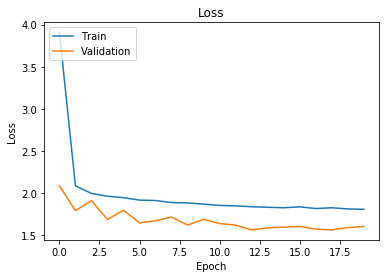

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
_= plt.legend(['Train','Validation'], loc='upper left')

In [29]:
y_preds = model.predict(Xtest)

In [30]:
from sklearn.metrics import r2_score

r2_score(Ytest, y_preds)

C:\Users\dragos.munteanu\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


0.579743828858607